In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv("customer_churn_large_dataset.csv")
cols = df.columns.to_list()
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [28]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [16]:
cols

['CustomerID',
 'Name',
 'Age',
 'Gender',
 'Location',
 'Subscription_Length_Months',
 'Monthly_Bill',
 'Total_Usage_GB',
 'Churn']

In [18]:
df.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


#### Columnar Analysis

Text(0.5, 1.0, 'Categorical Values for Churn')

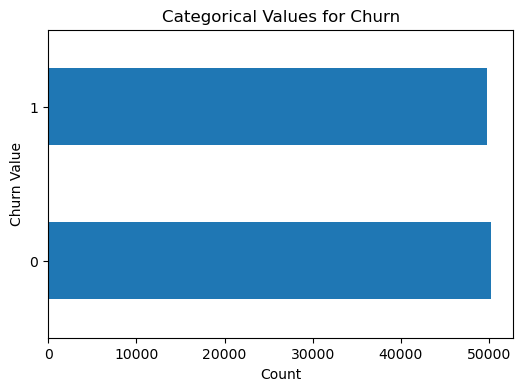

In [26]:
df['Churn'].value_counts().plot(kind = 'barh', figsize=(6,4))
plt.xlabel("Count")
plt.ylabel("Churn Value")
plt.title("Categorical Values for Churn")

In [27]:
100*df['Churn'].value_counts()/len(df)

0    50.221
1    49.779
Name: Churn, dtype: float64

Even Split between churn ~ 50:50 <br>
No need for Upsampling or Downsampling

#### Converting Subscription_Length_Months	to Categorical [creating bins]

In [30]:
df['Subscription_Length_Months'].max() #24

24

In [31]:
labels = [f"{i} - {i+11}" for i in range(1, 24, 12)]
df['Subscription_Length_Months_Group'] = pd.cut(df['Subscription_Length_Months'], range(1, 30, 12), right = False, labels = labels)

In [62]:
df['Subscription_Length_Months_Group'].value_counts()

1 - 12     50021
13 - 24    49979
Name: Subscription_Length_Months_Group, dtype: int64

In [58]:
df['Age'].max() #70

70

In [90]:
labels = [f"{i} - {i+10}" for i in range(10, 70, 10)]
df['Age_Group'] = pd.cut(df['Age'], range(9, 75, 10), right = False, labels = labels)
df['Age_Group'].value_counts()

50 - 60    18984
30 - 40    18858
40 - 50    18848
20 - 30    18824
60 - 70    18814
10 - 20     1839
Name: Age_Group, dtype: int64

In [140]:
df['Monthly_Bill'].max() #30 - 100

100.0

In [141]:
labels = [f"{i} - {i+10}" for i in range(30, 100, 10)]
df['Monthly_Bill_Group'] = pd.cut(df['Monthly_Bill'], range(29, 105, 10), right = False, labels = labels)
df['Monthly_Bill_Group'].value_counts()

90 - 100    14483
50 - 60     14324
40 - 50     14314
80 - 90     14286
60 - 70     14240
70 - 80     14153
30 - 40     12793
Name: Monthly_Bill_Group, dtype: int64

In [145]:
df['Total_Usage_GB'].max() #50 - 500

500

In [147]:
labels = [f"{i} - {i+50}" for i in range(50, 500, 50)]
df['Total_Usage_GB_Group'] = pd.cut(df['Total_Usage_GB'], range(49, 505, 50), right = False, labels = labels)
df['Total_Usage_GB_Group'].value_counts()

200 - 250    11187
100 - 150    11172
450 - 500    11130
350 - 400    11083
250 - 300    11056
150 - 200    11031
50 - 100     10994
300 - 350    10983
400 - 450    10883
Name: Total_Usage_GB_Group, dtype: int64

#### Removing unnecessary Cols

In [91]:
df.drop(columns = ['CustomerID','Name'], inplace = True)
df.info(verbose = True)

KeyError: "['CustomerID', 'Name'] not found in axis"

#### Convert categorical columns into dummy ones [get_dummies]

In [149]:
df_d = pd.get_dummies(df)
df_d.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 36 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Age                                       100000 non-null  int64  
 1   Subscription_Length_Months                100000 non-null  int64  
 2   Monthly_Bill                              100000 non-null  float64
 3   Total_Usage_GB                            100000 non-null  int64  
 4   Churn                                     100000 non-null  int64  
 5   Gender_Female                             100000 non-null  uint8  
 6   Gender_Male                               100000 non-null  uint8  
 7   Location_Chicago                          100000 non-null  uint8  
 8   Location_Houston                          100000 non-null  uint8  
 9   Location_Los Angeles                      100000 non-null  uint8  
 10  Location_Miami       

## Data Exploration

In [150]:
cols = df.columns.to_list()
cols

['Age',
 'Gender',
 'Location',
 'Subscription_Length_Months',
 'Monthly_Bill',
 'Total_Usage_GB',
 'Churn',
 'Subscription_Length_Months_Group',
 'Age_Group',
 'Monthly_Bill_Group',
 'Total_Usage_GB_Group']

#### Univariate Analysis

In [151]:
dd = ['Age','Subscription_Length_Months','Monthly_Bill','Total_Usage_GB','Churn']

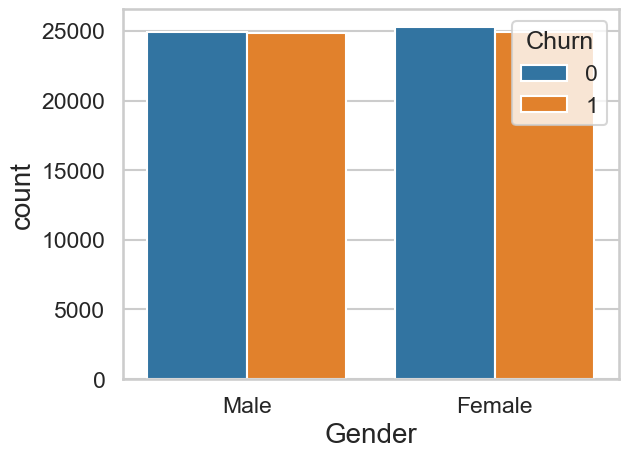

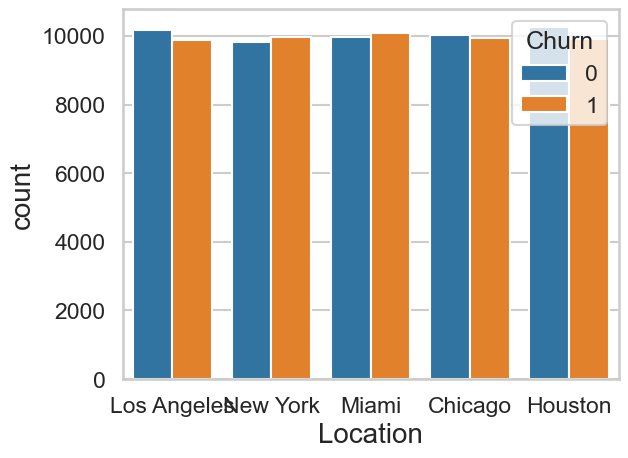

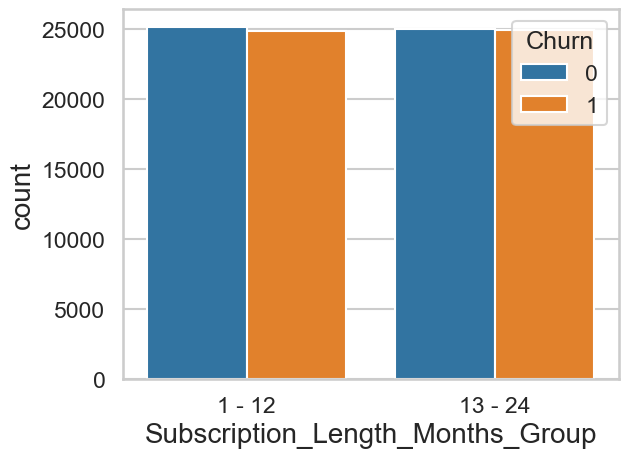

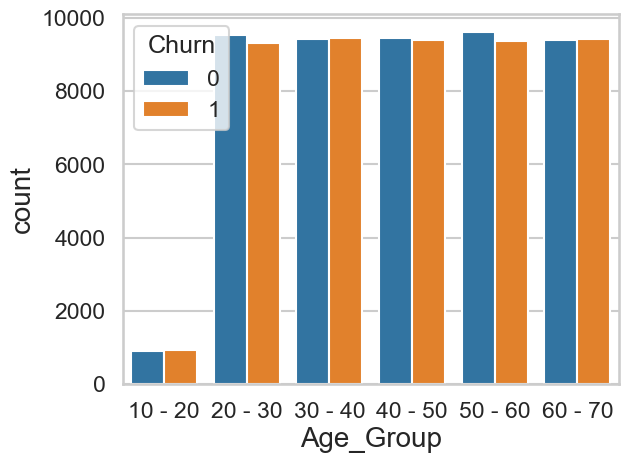

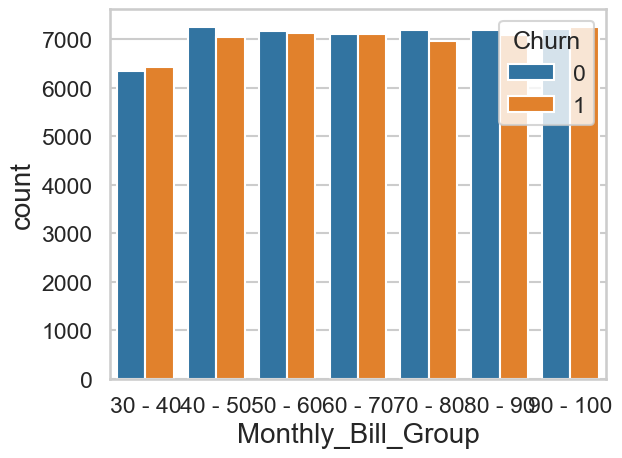

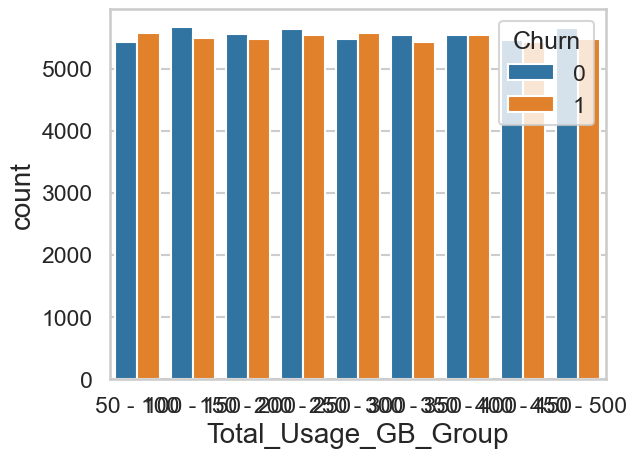

In [152]:
for i, pred in enumerate(df.drop(columns = dd)):
    plt.figure(i)
    sns.countplot(data = df, x = pred, hue = 'Churn')

No column stand alone has a definitive effect on the Churn

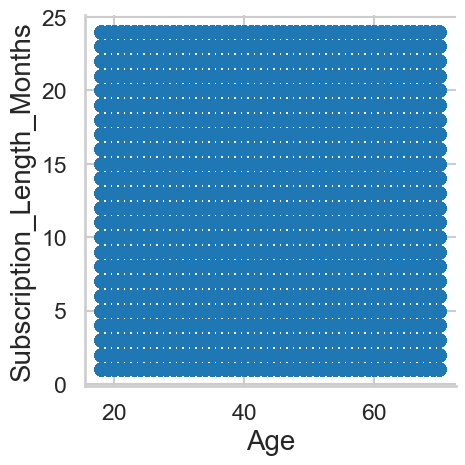

In [153]:
sns.lmplot(data = df, x = 'Age', y = 'Subscription_Length_Months', fit_reg = False)

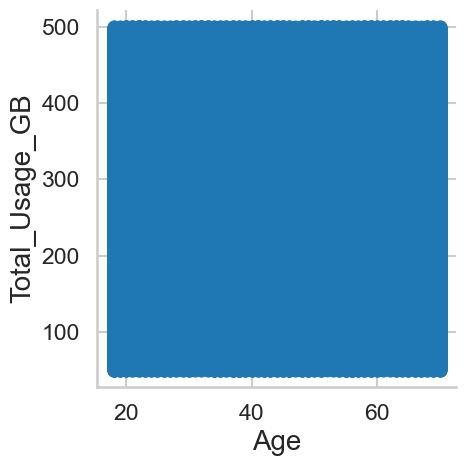

In [154]:
sns.lmplot(data = df, x = 'Age', y = 'Total_Usage_GB', fit_reg = False)

No inference at all: all age groups have bought almost every type of subscription

Text(0.5, 1.0, 'Density v/s Subscription Length')

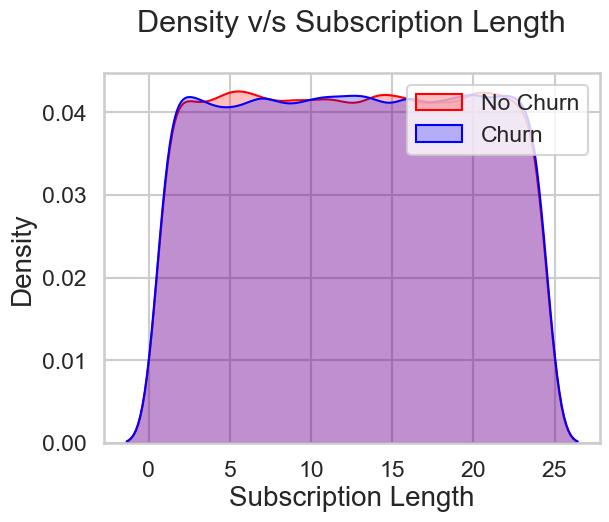

In [155]:
m = sns.kdeplot(df.Subscription_Length_Months[df['Churn'] == 0],
               color = "Red", shade = True)
m = sns.kdeplot(df.Subscription_Length_Months[df['Churn'] == 1],
               ax = m, color = "Blue", shade = True)
m.legend(["No Churn", "Churn"], loc="upper right")
m.set_ylabel('Density')
m.set_xlabel('Subscription Length')
m.set_title('Density v/s Subscription Length')

Text(0.5, 1.0, 'Density v/s Age')

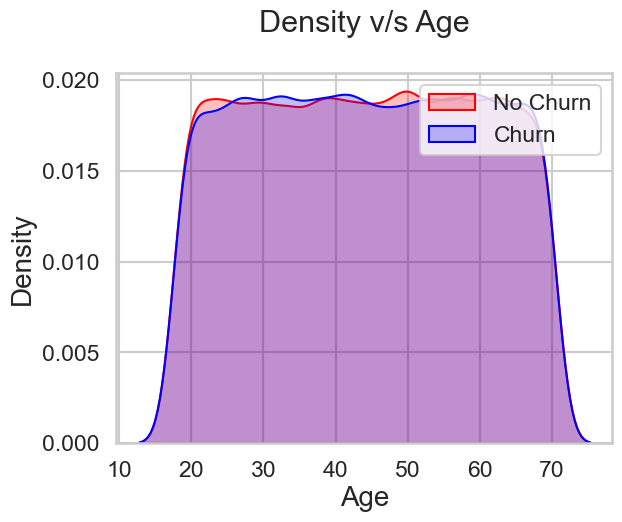

In [156]:
m = sns.kdeplot(df.Age[df['Churn'] == 0],
               color = "Red", shade = True)
m = sns.kdeplot(df.Age[df['Churn'] == 1],
               ax = m, color = "Blue", shade = True)
m.legend(["No Churn", "Churn"], loc="upper right")
m.set_ylabel('Density')
m.set_xlabel('Age')
m.set_title('Density v/s Age')

Text(0.5, 1.0, 'Density v/s Total_Usage_GB')

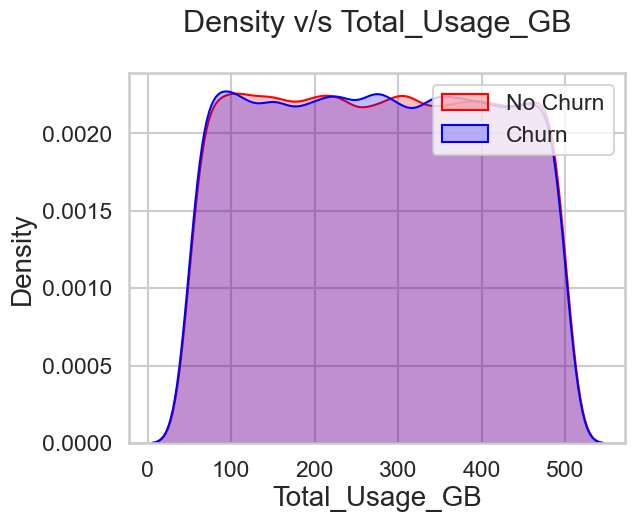

In [157]:
m = sns.kdeplot(df.Total_Usage_GB[df['Churn'] == 0],
               color = "Red", shade = True)
m = sns.kdeplot(df.Total_Usage_GB[df['Churn'] == 1],
               ax = m, color = "Blue", shade = True)
m.legend(["No Churn", "Churn"], loc="upper right")
m.set_ylabel('Density')
m.set_xlabel('Total_Usage_GB')
m.set_title('Density v/s Total_Usage_GB')

Text(0.5, 1.0, 'Density v/s Monthly_Bill')

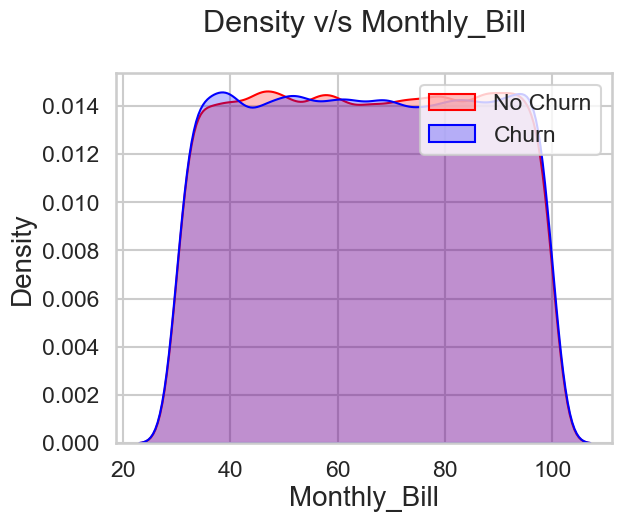

In [158]:
m = sns.kdeplot(df.Monthly_Bill[df['Churn'] == 0],
               color = "Red", shade = True)
m = sns.kdeplot(df.Monthly_Bill[df['Churn'] == 1],
               ax = m, color = "Blue", shade = True)
m.legend(["No Churn", "Churn"], loc="upper right")
m.set_ylabel('Density')
m.set_xlabel('Monthly_Bill')
m.set_title('Density v/s Monthly_Bill')

<AxesSubplot:>

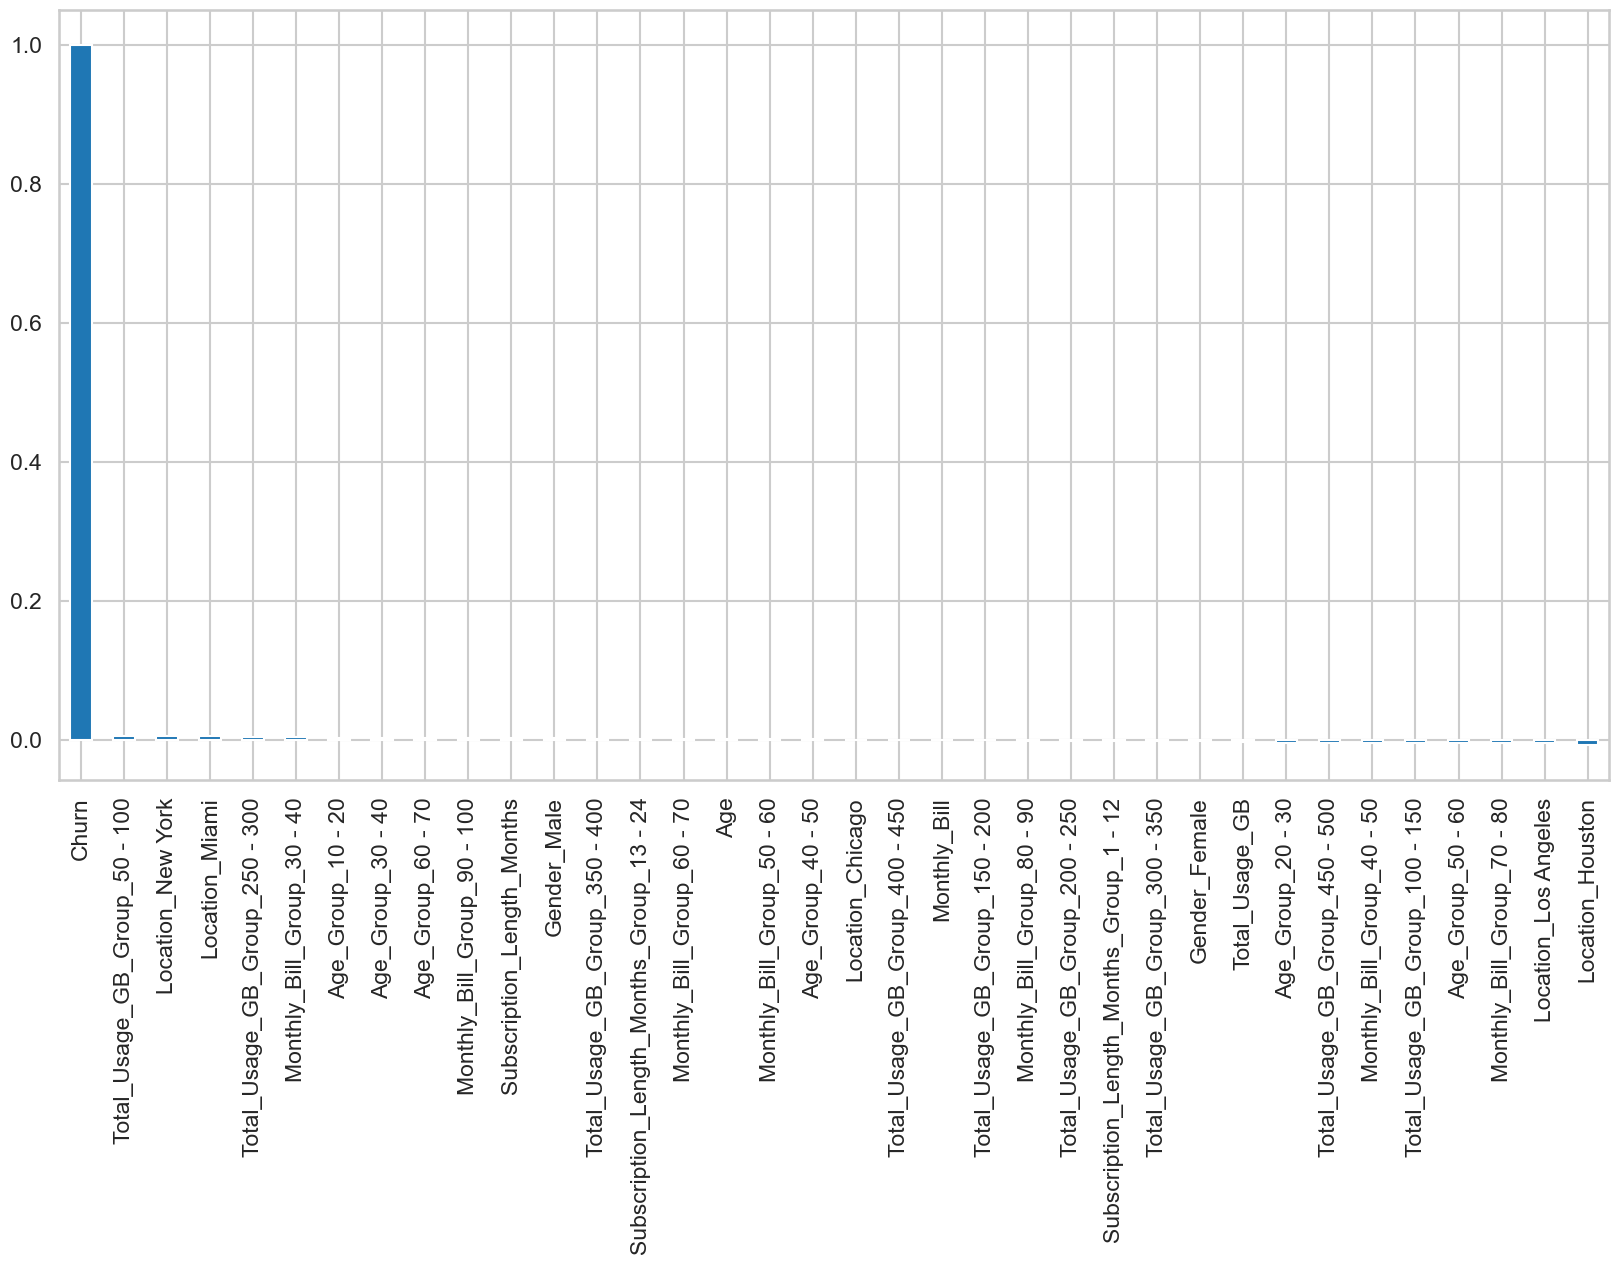

In [159]:
plt.figure(figsize = (20,10))
df_d.corr()['Churn'].sort_values(ascending = False).plot(kind = 'bar')

<AxesSubplot:>

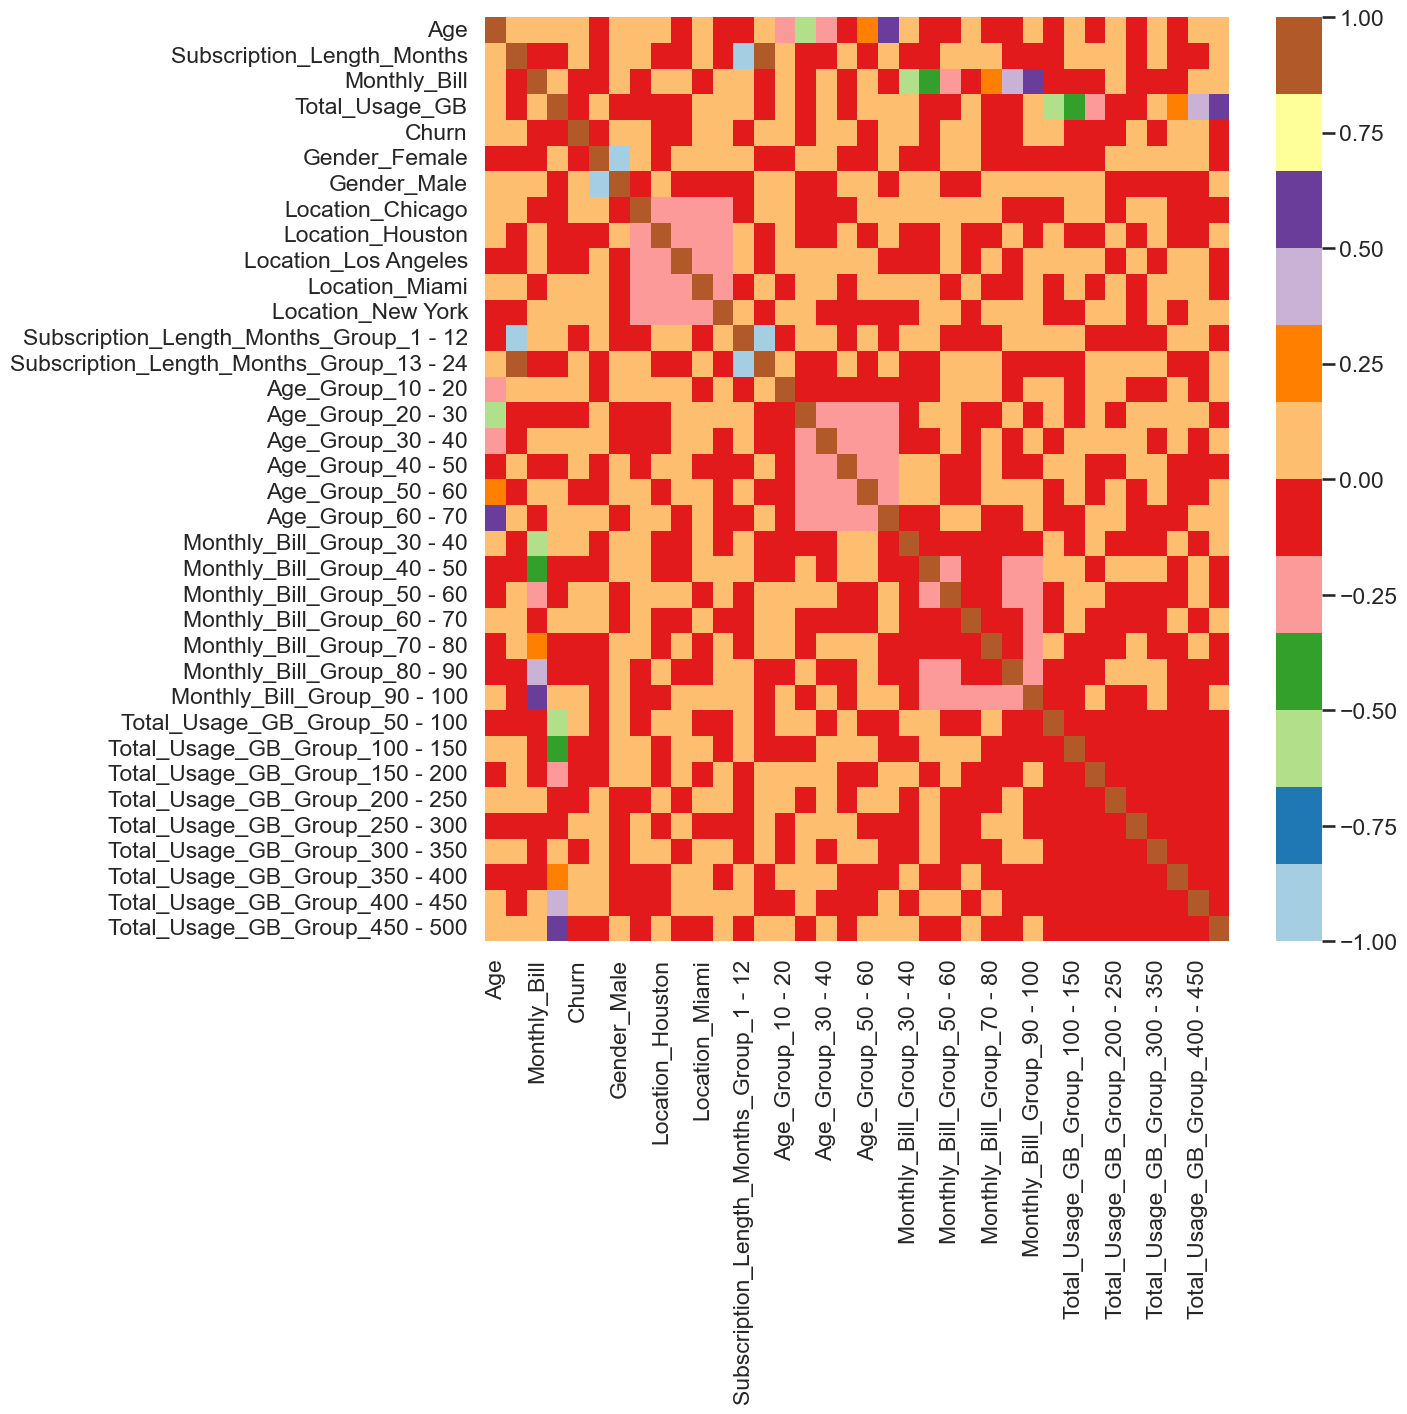

In [160]:
plt.figure(figsize = (12,12))
sns.heatmap(df_d.corr(), cmap = "Paired")

Very little insights

#### Bivariate Analysis

In [161]:
cols = df.columns.to_list()
cols

['Age',
 'Gender',
 'Location',
 'Subscription_Length_Months',
 'Monthly_Bill',
 'Total_Usage_GB',
 'Churn',
 'Subscription_Length_Months_Group',
 'Age_Group',
 'Monthly_Bill_Group',
 'Total_Usage_GB_Group']

In [162]:
new_df0 = df.loc[df["Churn"] == 0]
new_df1 = df.loc[df["Churn"] == 1]

In [163]:
def uniplot(df, col, title, hue = None):
    sns.set_style('whitegrid')
    sns.set_context("talk")
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams["axes.titlesize"] = 22
    plt.rcParams["axes.titlepad"] = 30
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    w = len(df[col].unique()) + 7 + 4 * len(temp.unique())
    fig.set_size_inches(w, 8)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x = col, order = df[col].value_counts().index, hue = hue, palette = 'bright')
    plt.show()

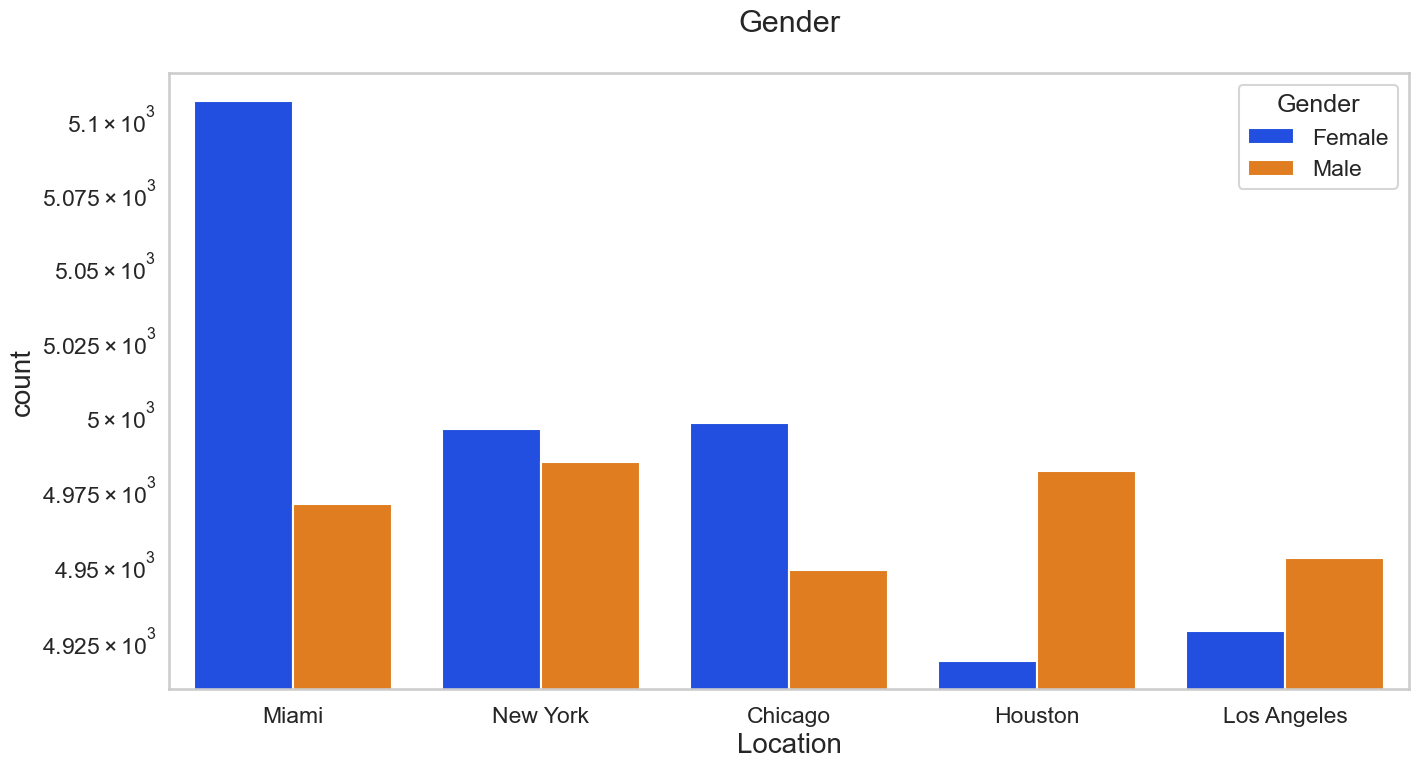

In [164]:
uniplot(new_df1, col = 'Location', title = 'Gender', hue = 'Gender')

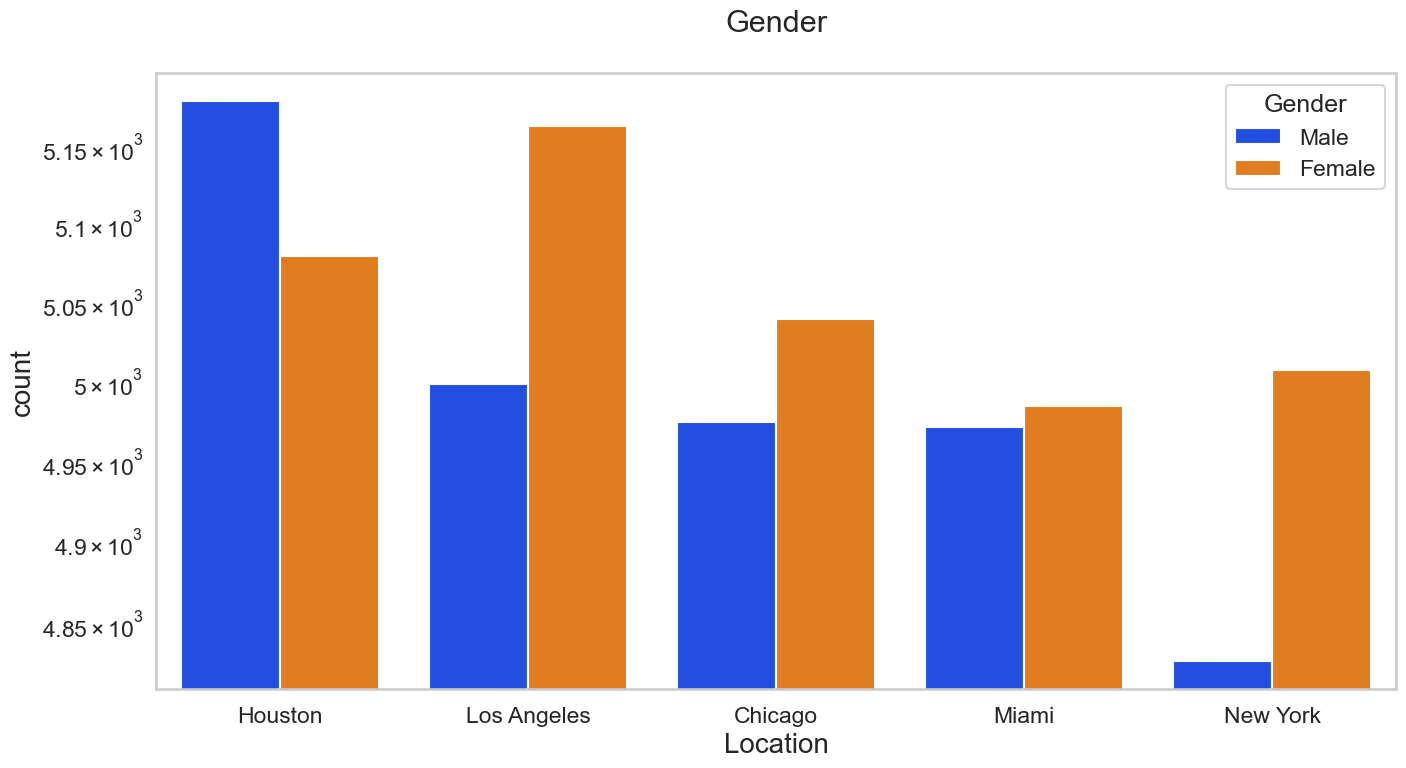

In [165]:
uniplot(new_df0, col = 'Location', title = 'Gender', hue = 'Gender')

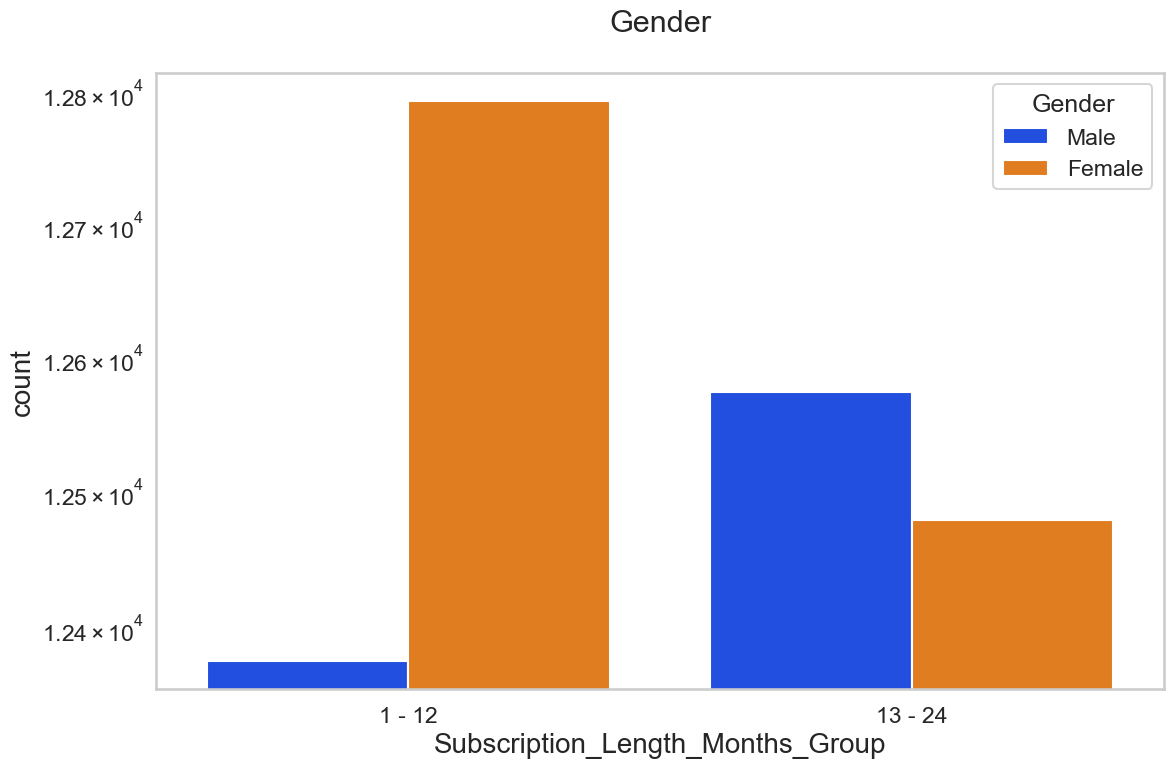

In [166]:
uniplot(new_df0, col = 'Subscription_Length_Months_Group', title = 'Gender', hue = 'Gender')

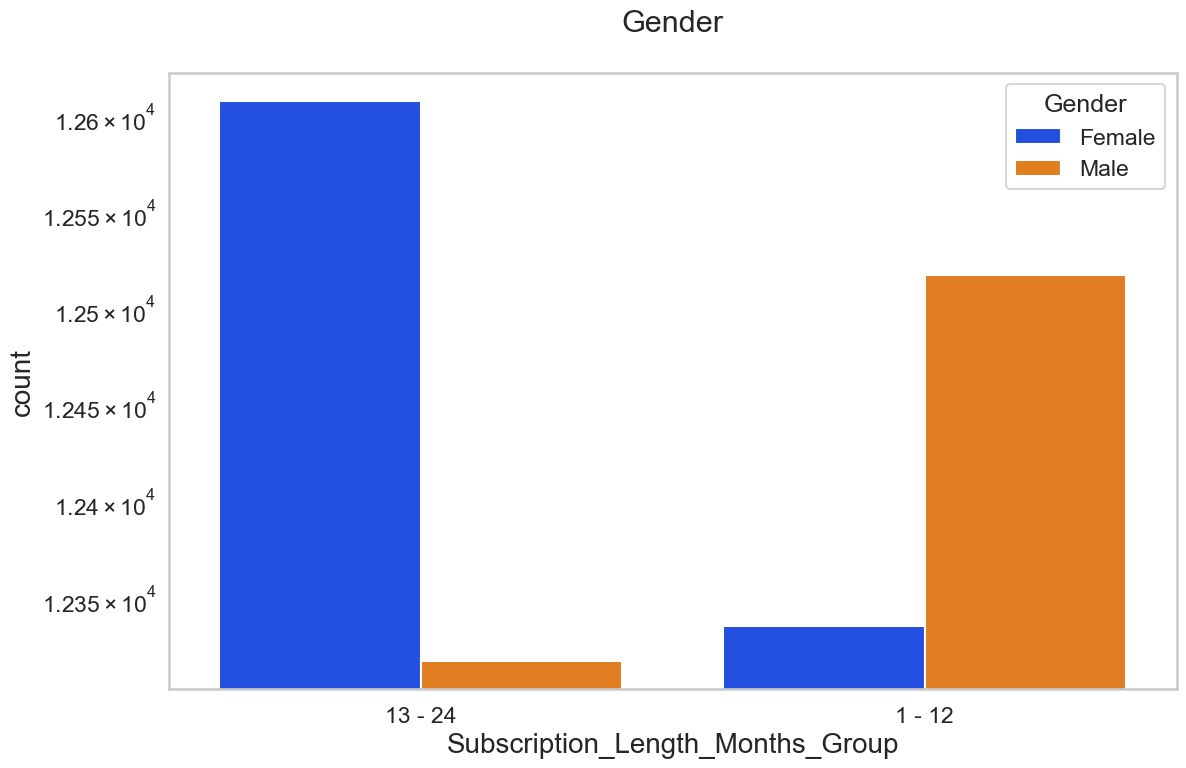

In [167]:
uniplot(new_df1, col = 'Subscription_Length_Months_Group', title = 'Gender', hue = 'Gender')

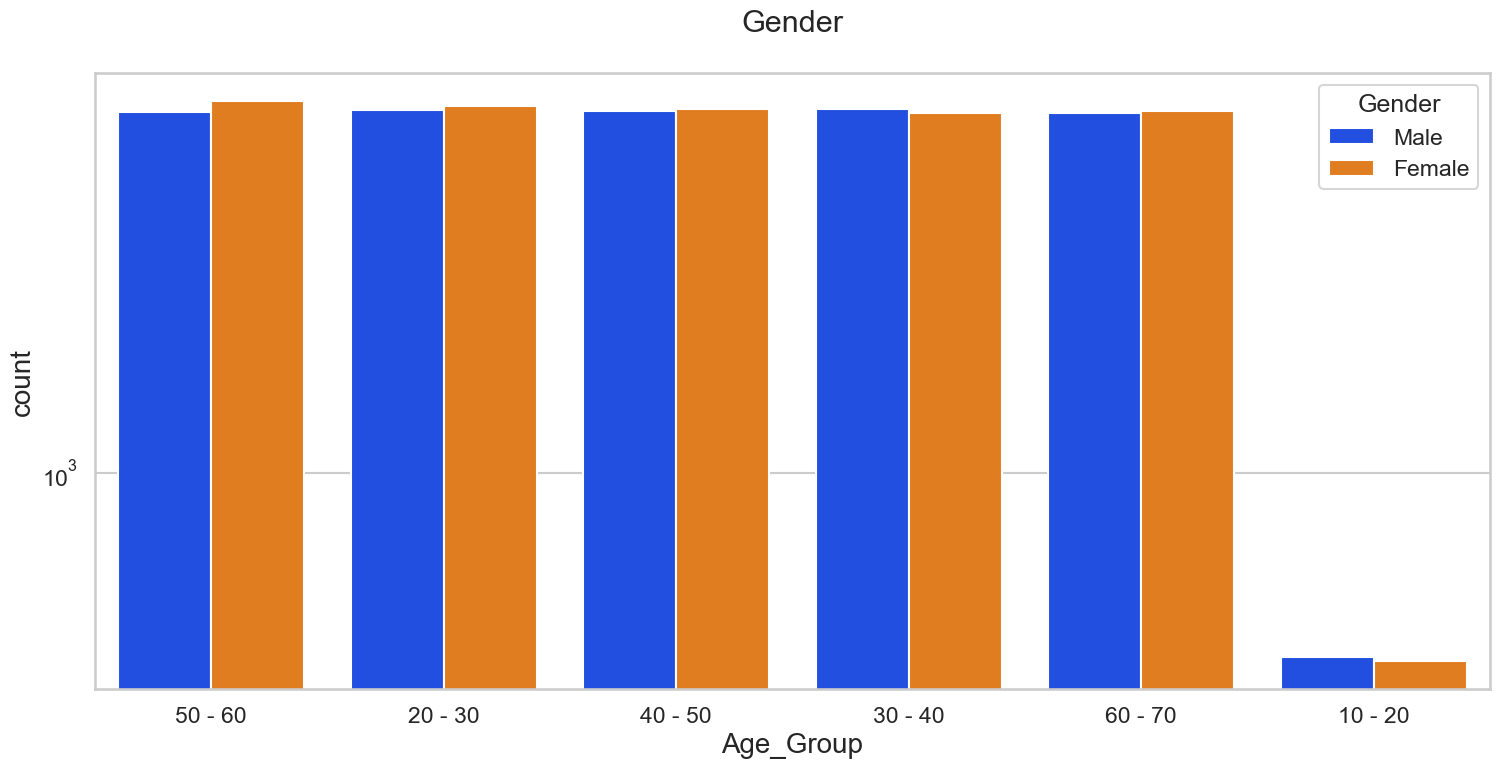

In [168]:
uniplot(new_df0, col = 'Age_Group', title = 'Gender', hue = 'Gender')

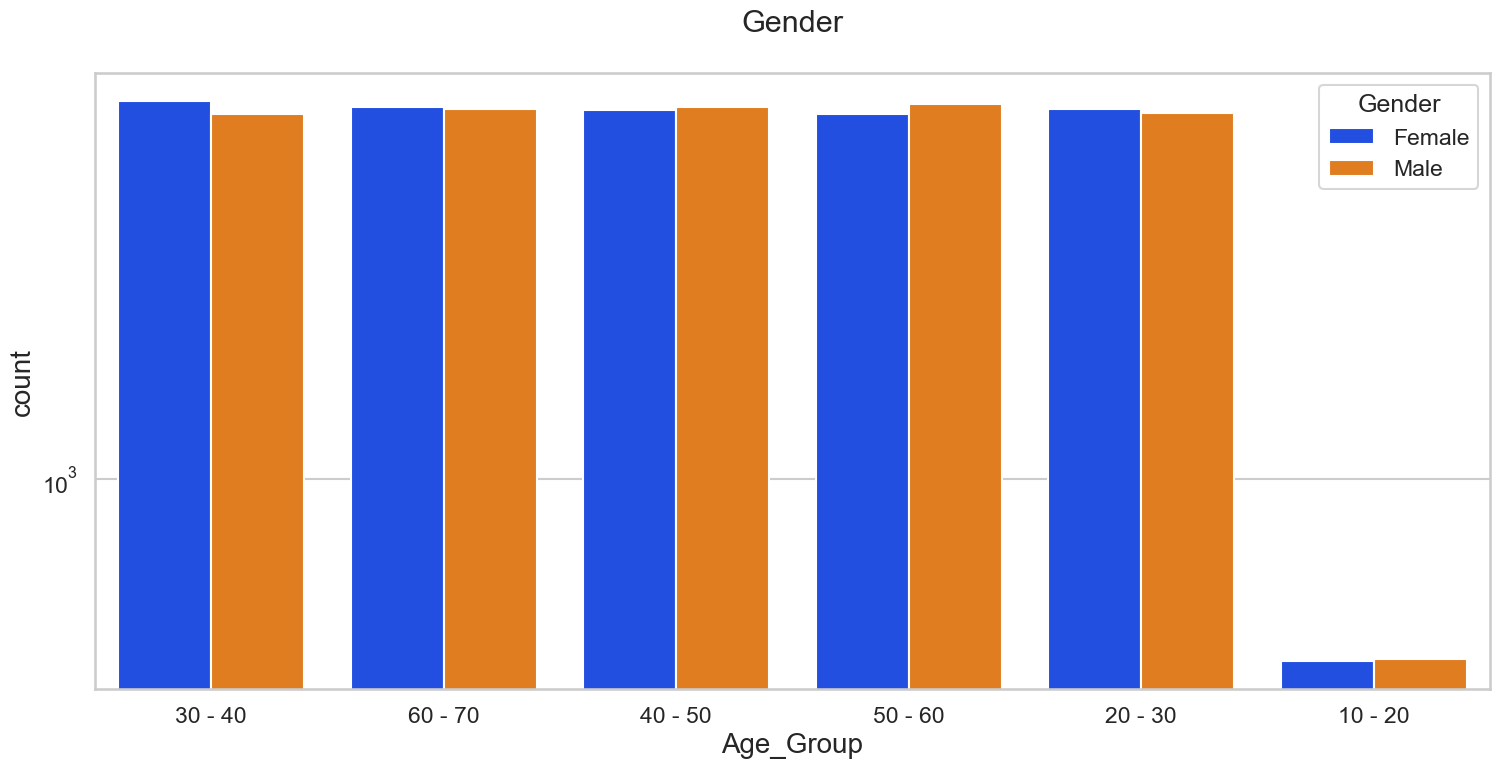

In [169]:
uniplot(new_df1, col = 'Age_Group', title = 'Gender', hue = 'Gender')

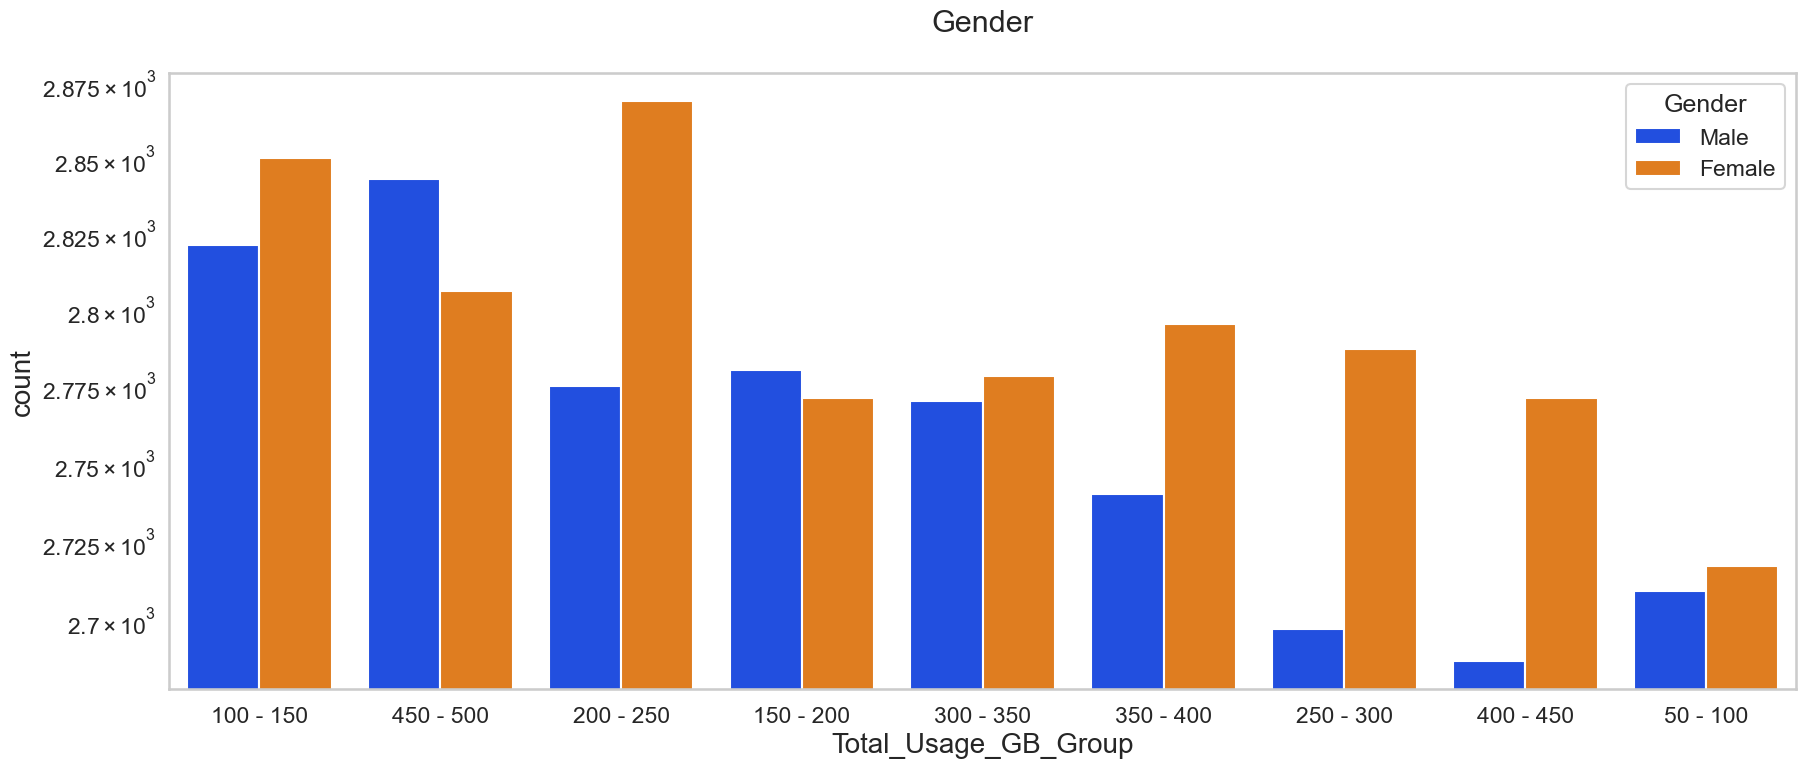

In [170]:
uniplot(new_df0, col = 'Total_Usage_GB_Group', title = 'Gender', hue = 'Gender')

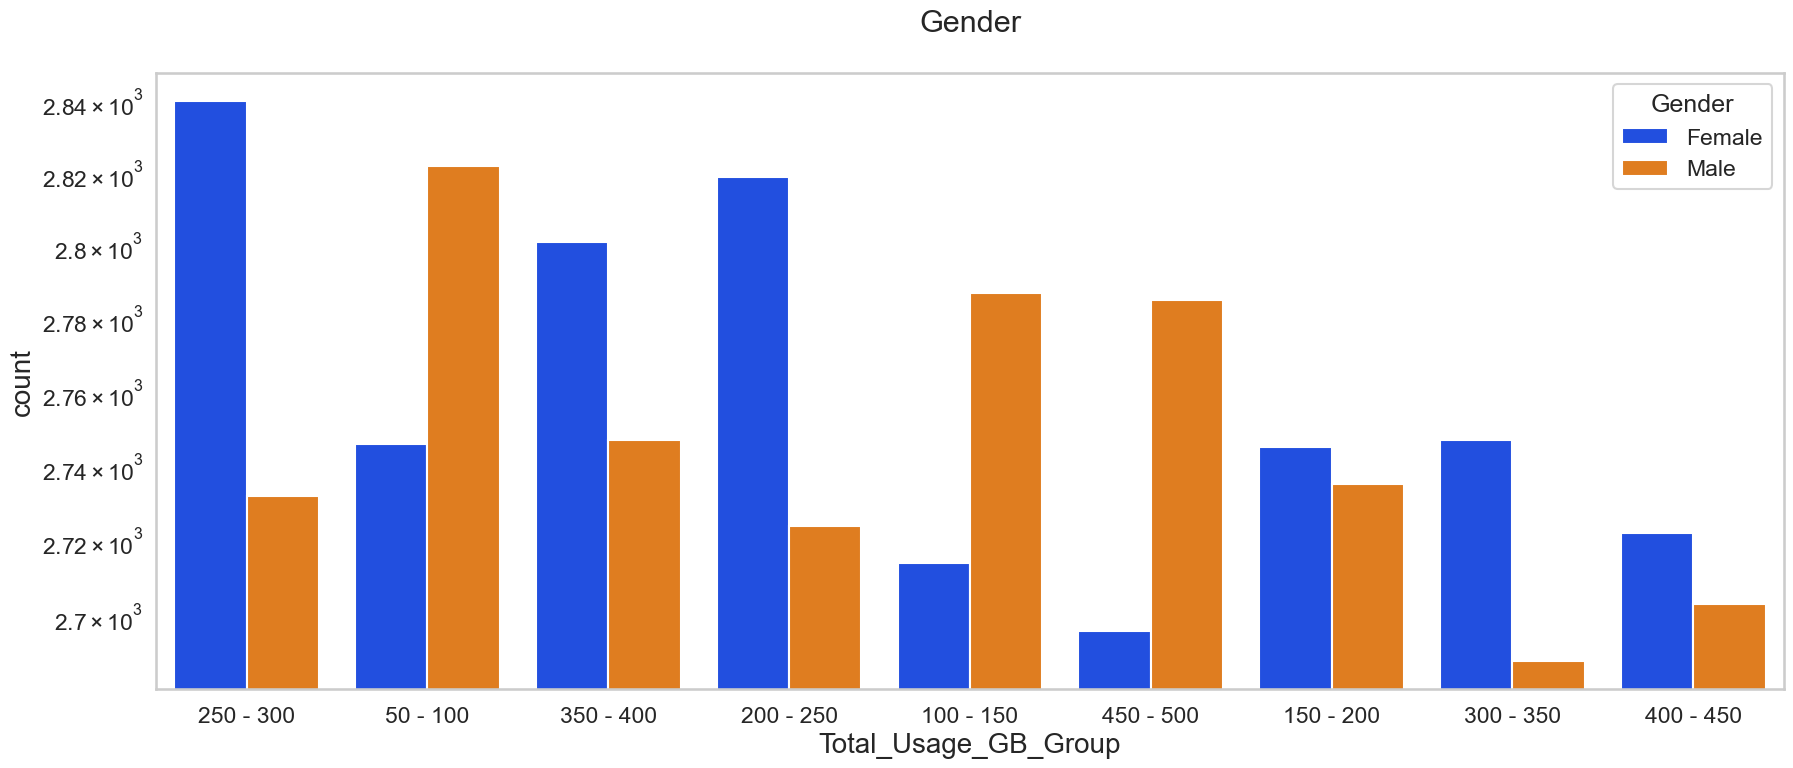

In [171]:
uniplot(new_df1, col = 'Total_Usage_GB_Group', title = 'Gender', hue = 'Gender')

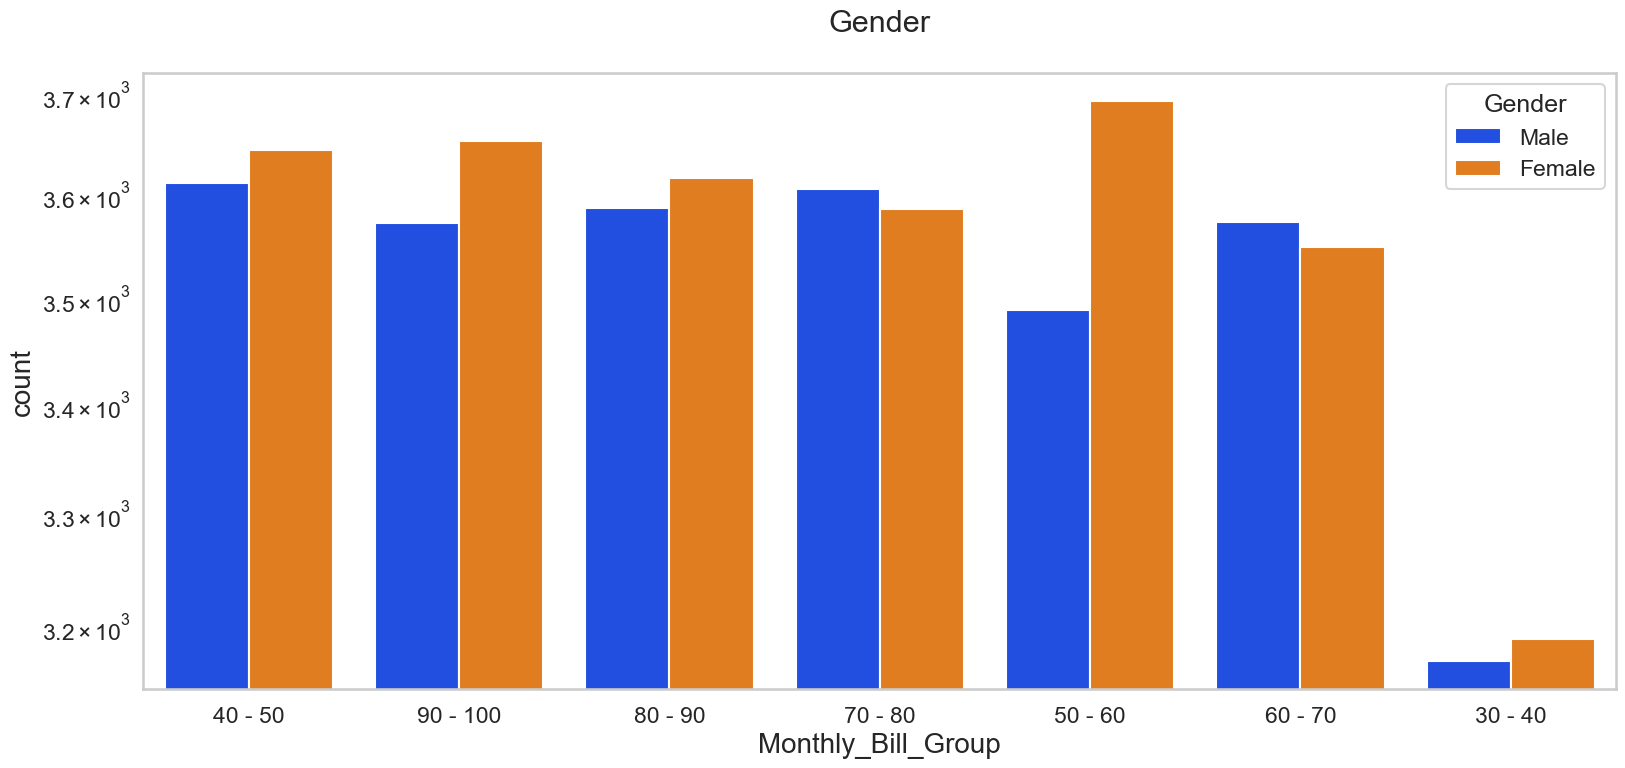

In [172]:
uniplot(new_df0, col = 'Monthly_Bill_Group', title = 'Gender', hue = 'Gender')

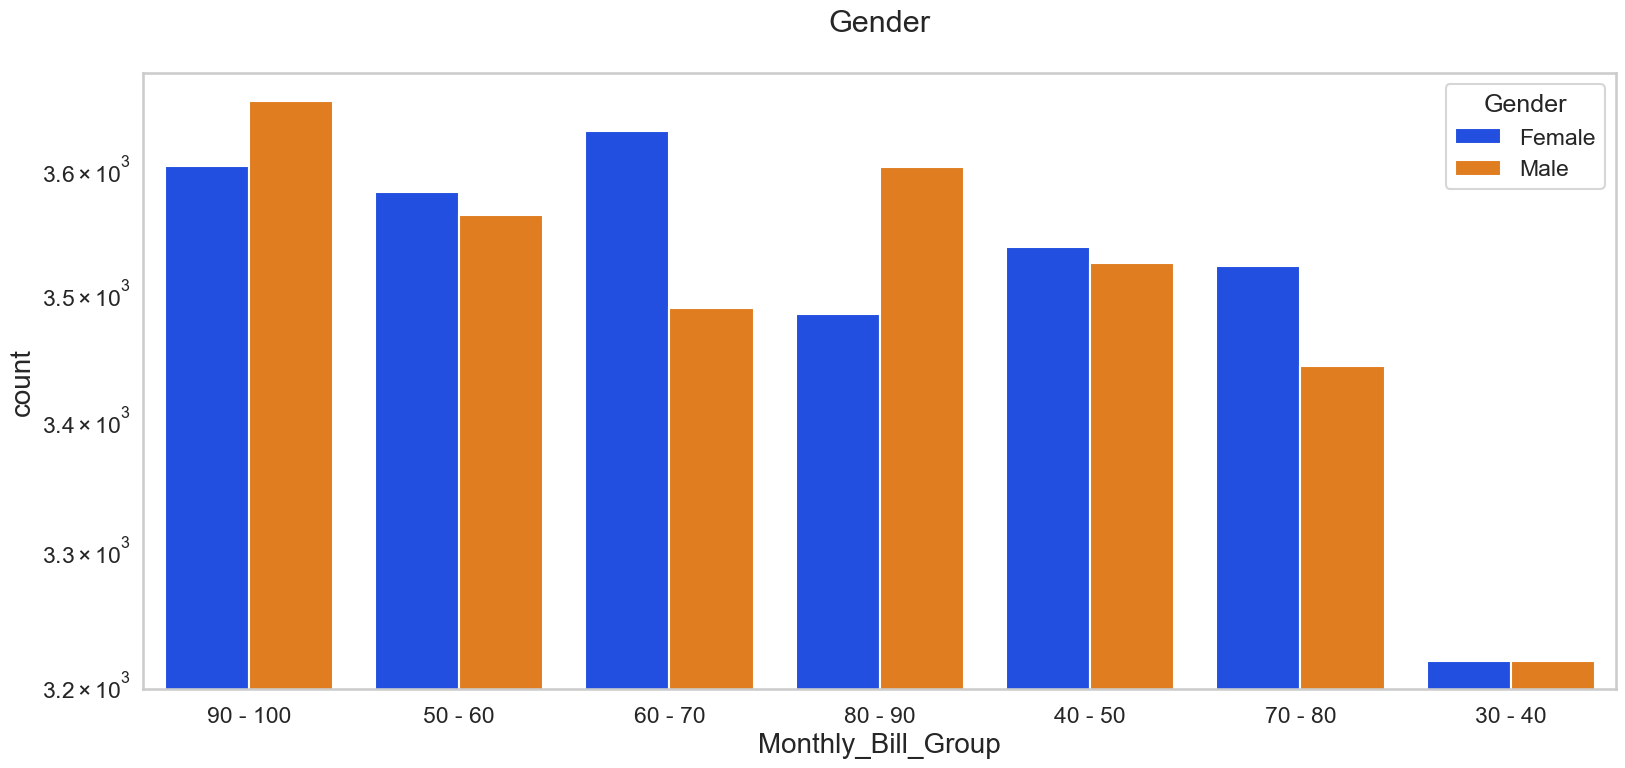

In [173]:
uniplot(new_df1, col = 'Monthly_Bill_Group', title = 'Gender', hue = 'Gender')

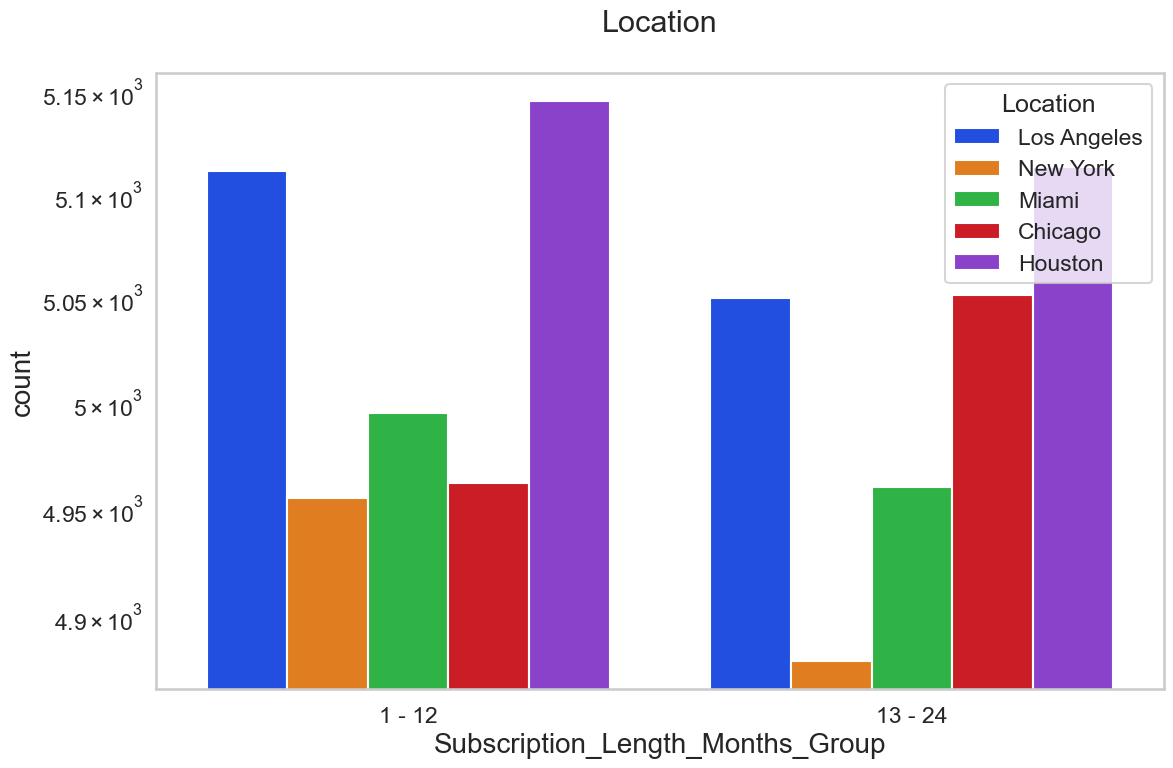

In [131]:
uniplot(new_df0, col = 'Subscription_Length_Months_Group', title = 'Location', hue = 'Location')

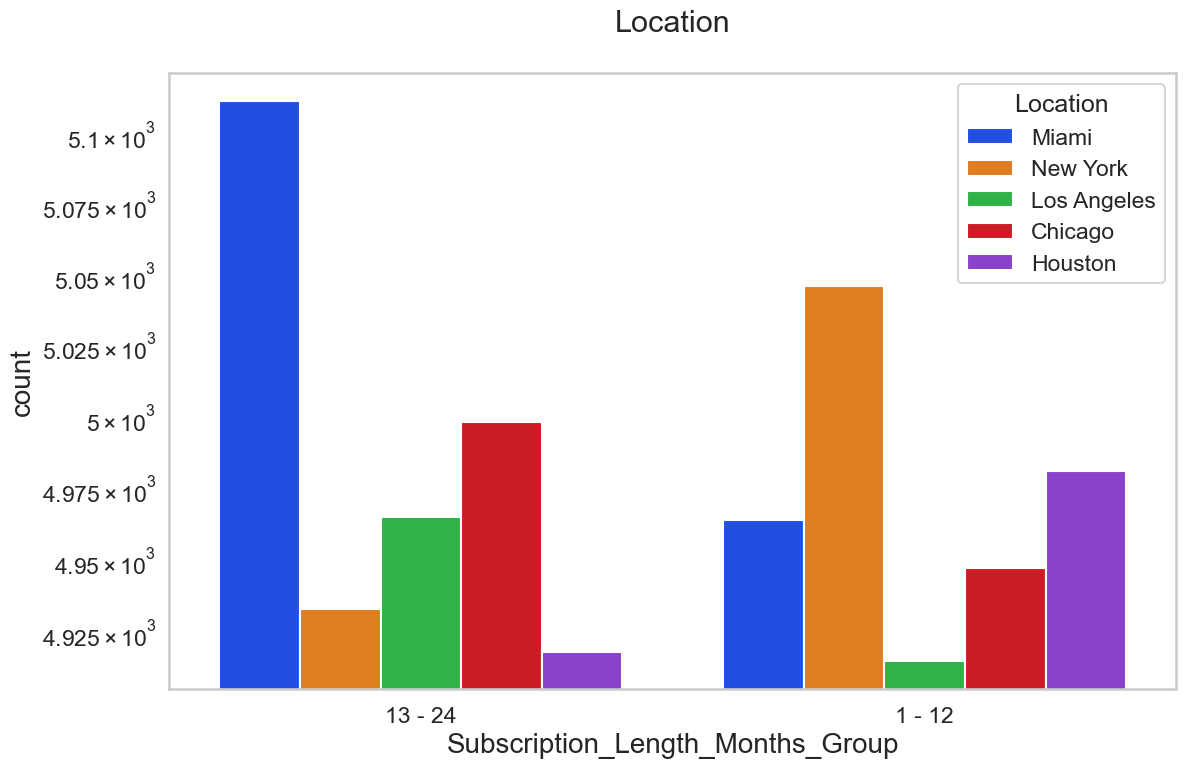

In [132]:
uniplot(new_df1, col = 'Subscription_Length_Months_Group', title = 'Location', hue = 'Location')

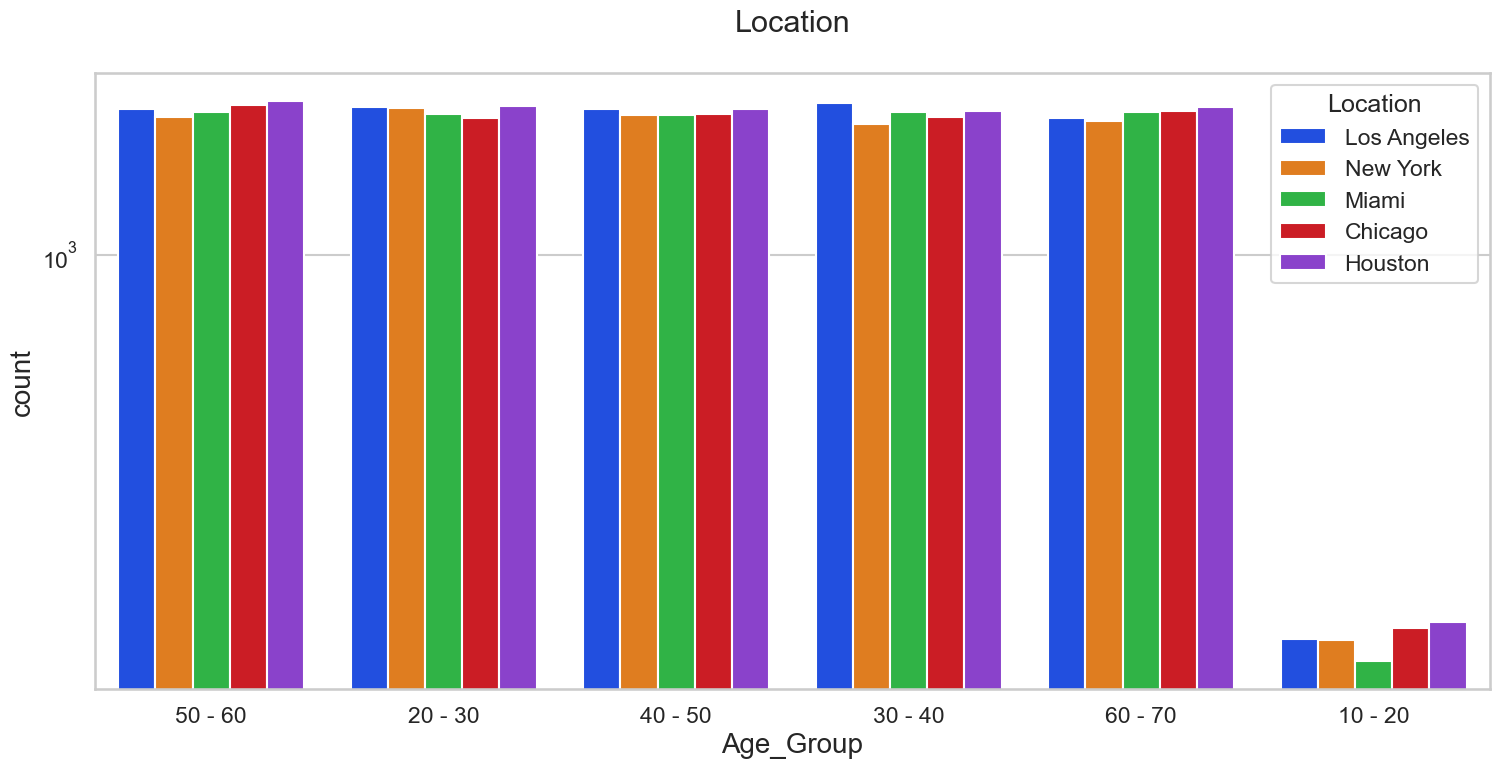

In [133]:
uniplot(new_df0, col = 'Age_Group', title = 'Location', hue = 'Location')

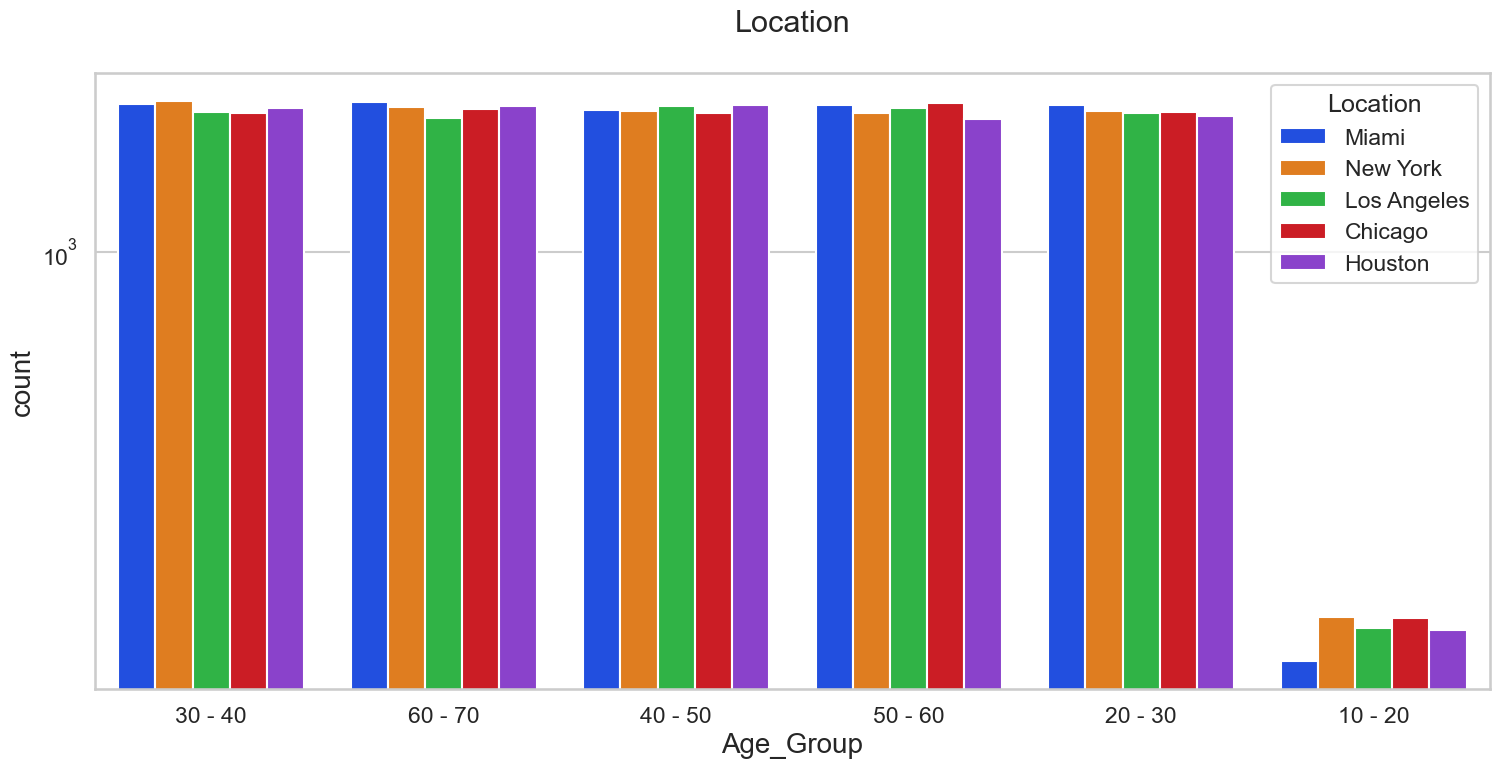

In [174]:
uniplot(new_df1, col = 'Age_Group', title = 'Location', hue = 'Location')

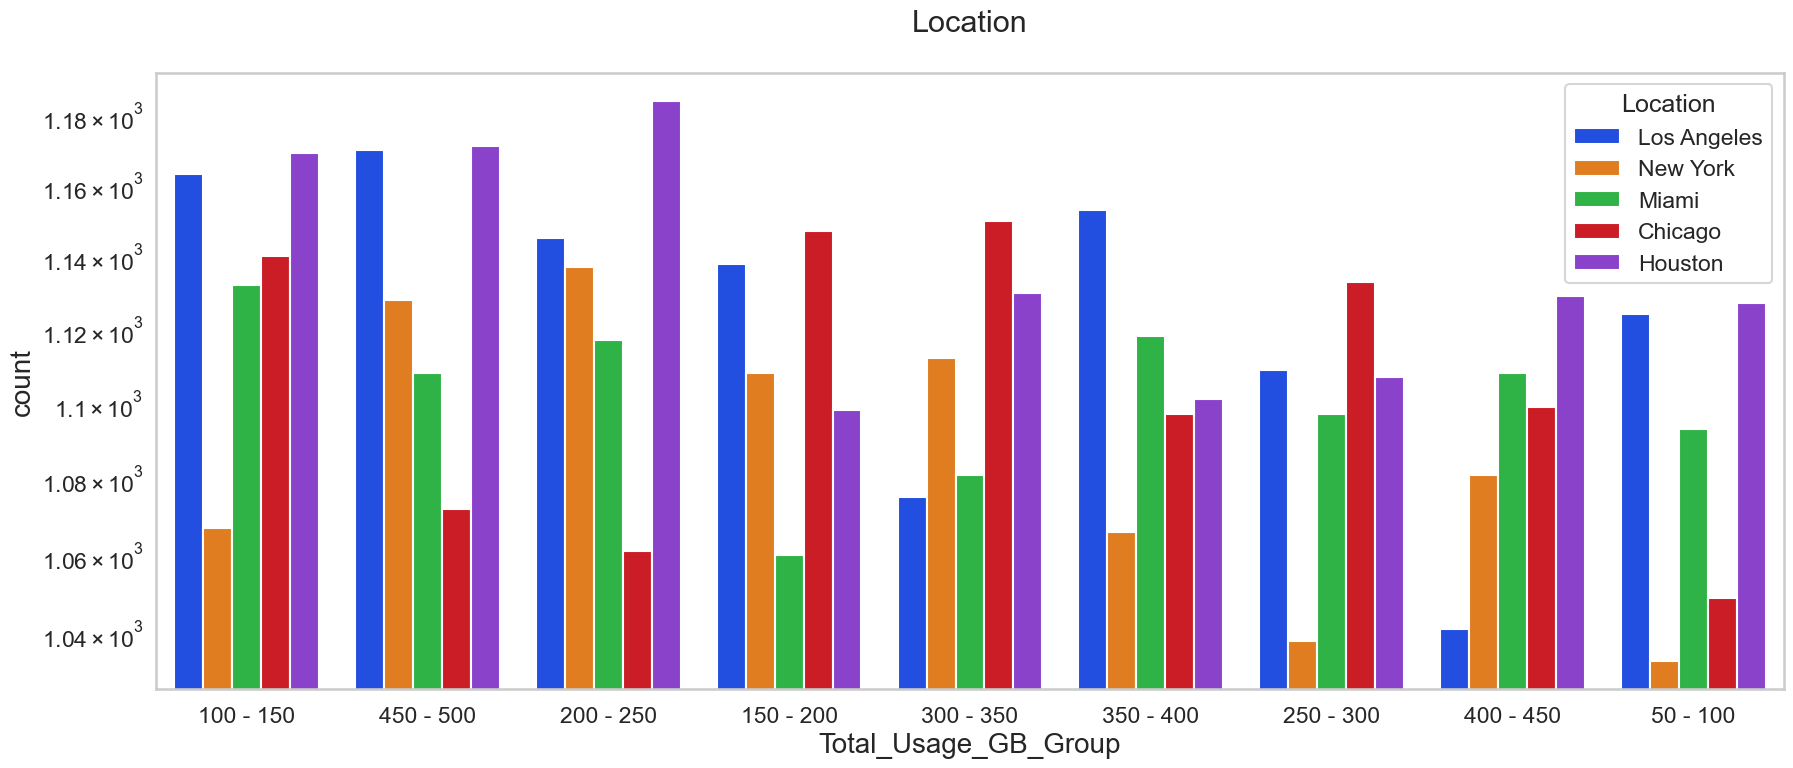

In [176]:
uniplot(new_df0, col = 'Total_Usage_GB_Group', title = 'Location', hue = 'Location')

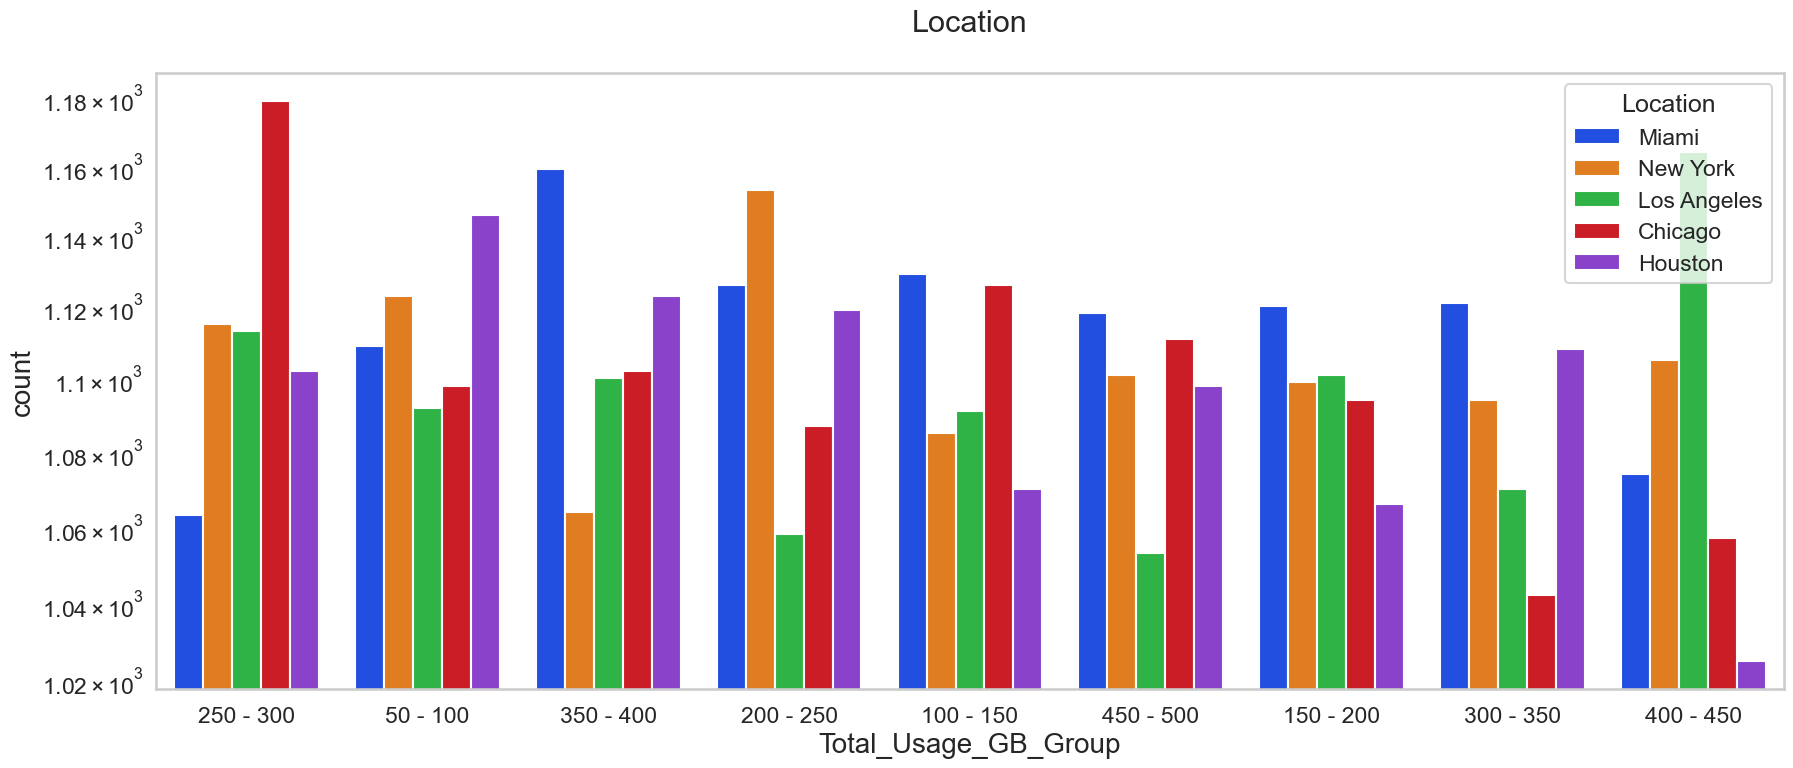

In [177]:
uniplot(new_df1, col = 'Total_Usage_GB_Group', title = 'Location', hue = 'Location')

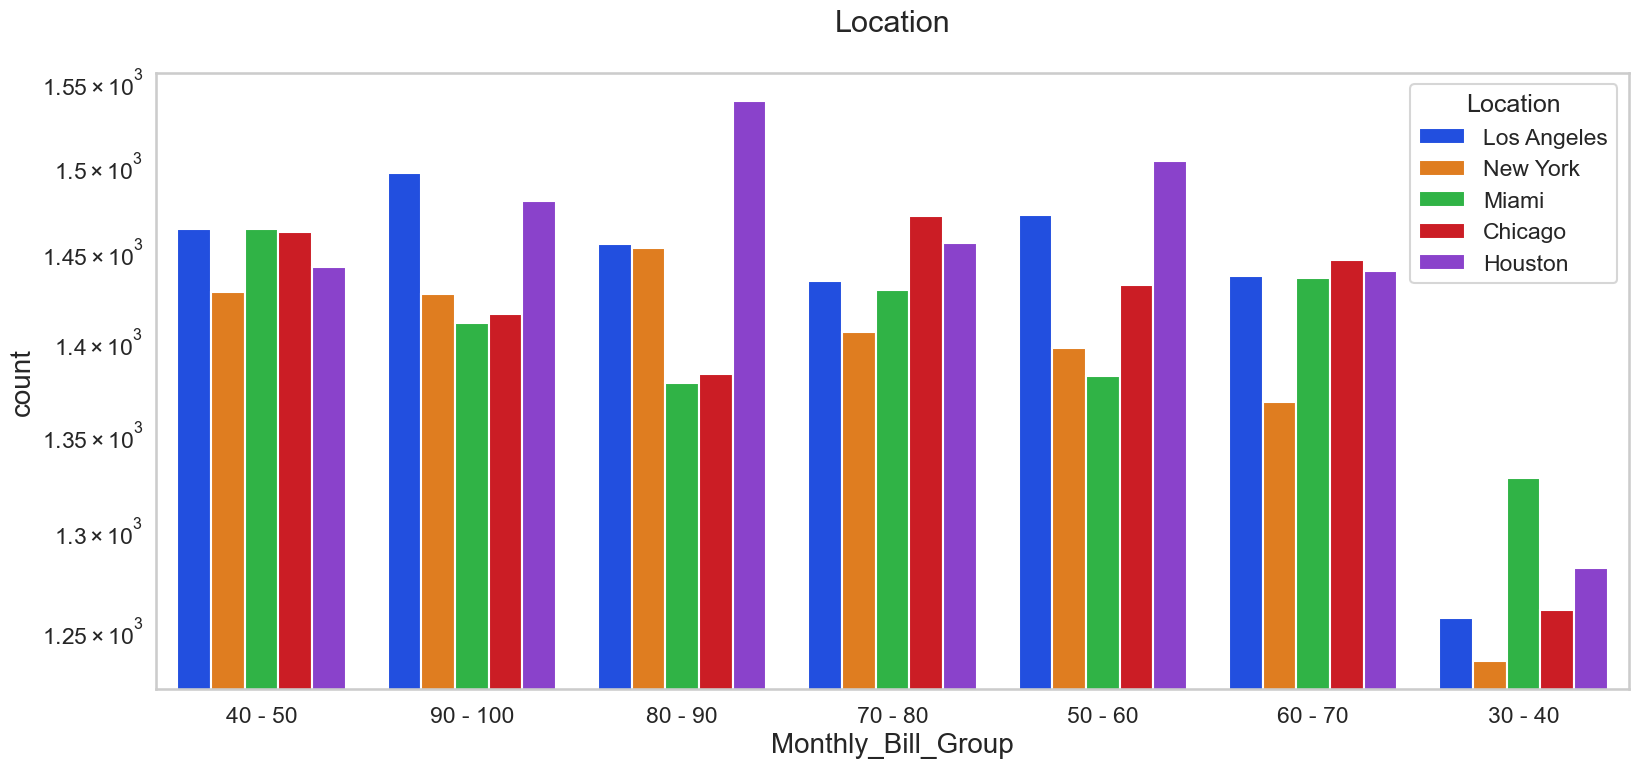

In [178]:
uniplot(new_df0, col = 'Monthly_Bill_Group', title = 'Location', hue = 'Location')

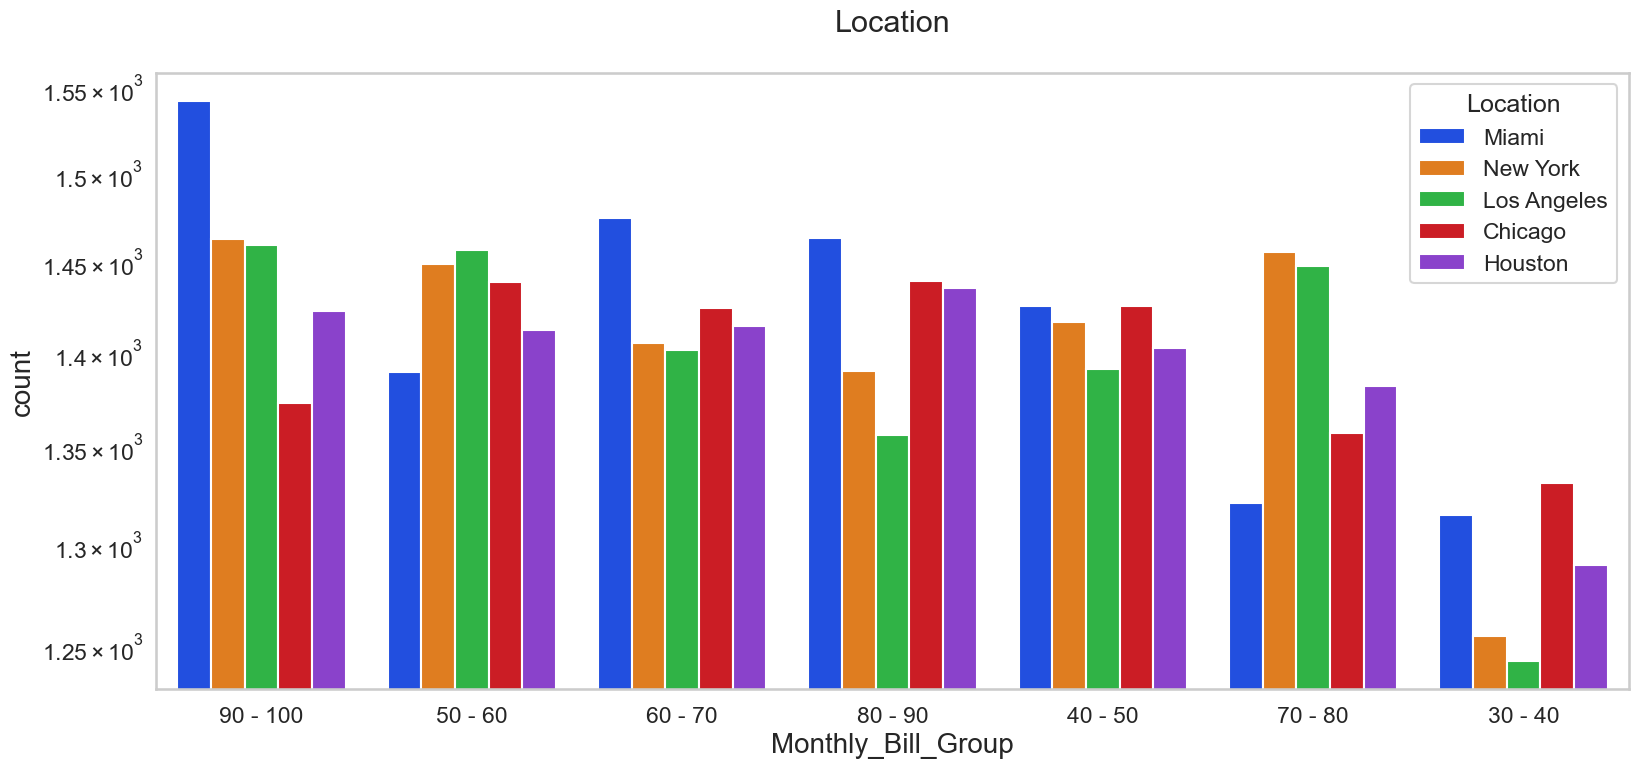

In [179]:
uniplot(new_df1, col = 'Monthly_Bill_Group', title = 'Location', hue = 'Location')

Results of Uni and Bi variate analysis<br>
<ul>
    <li>Females are more likely to churn in Miami,  while males in NY</li>
    <li>Both are less likely to churn in Houston, LA and Chichago</li>
    <li>Data is pretty evenly distributed</li>
</ul>
<br><br>

So, let's take: [Location, Gender, Age_Group, Subscription_Length_Months_Group, Monthly_Bill_Group, Total_Usage_GB_Group] for model building

In [181]:
df_d.to_csv('data_churn.csv', index = False)

In [182]:
df_d.columns.to_list()

['Age',
 'Subscription_Length_Months',
 'Monthly_Bill',
 'Total_Usage_GB',
 'Churn',
 'Gender_Female',
 'Gender_Male',
 'Location_Chicago',
 'Location_Houston',
 'Location_Los Angeles',
 'Location_Miami',
 'Location_New York',
 'Subscription_Length_Months_Group_1 - 12',
 'Subscription_Length_Months_Group_13 - 24',
 'Age_Group_10 - 20',
 'Age_Group_20 - 30',
 'Age_Group_30 - 40',
 'Age_Group_40 - 50',
 'Age_Group_50 - 60',
 'Age_Group_60 - 70',
 'Monthly_Bill_Group_30 - 40',
 'Monthly_Bill_Group_40 - 50',
 'Monthly_Bill_Group_50 - 60',
 'Monthly_Bill_Group_60 - 70',
 'Monthly_Bill_Group_70 - 80',
 'Monthly_Bill_Group_80 - 90',
 'Monthly_Bill_Group_90 - 100',
 'Total_Usage_GB_Group_50 - 100',
 'Total_Usage_GB_Group_100 - 150',
 'Total_Usage_GB_Group_150 - 200',
 'Total_Usage_GB_Group_200 - 250',
 'Total_Usage_GB_Group_250 - 300',
 'Total_Usage_GB_Group_300 - 350',
 'Total_Usage_GB_Group_350 - 400',
 'Total_Usage_GB_Group_400 - 450',
 'Total_Usage_GB_Group_450 - 500']

In [206]:
ndfd = df_d.drop(columns = ['Age_Group_10 - 20',
 'Age_Group_20 - 30',
 'Age_Group_30 - 40',
 'Age_Group_40 - 50',
 'Age_Group_50 - 60',
 'Age_Group_60 - 70',
 'Subscription_Length_Months',
 'Monthly_Bill',
 'Total_Usage_GB','Monthly_Bill_Group_30 - 40',
 'Monthly_Bill_Group_40 - 50',
 'Monthly_Bill_Group_50 - 60',
 'Monthly_Bill_Group_60 - 70',
 'Monthly_Bill_Group_70 - 80',
 'Monthly_Bill_Group_80 - 90',
 'Monthly_Bill_Group_90 - 100',
 'Total_Usage_GB_Group_50 - 100',
 'Total_Usage_GB_Group_100 - 150',
 'Total_Usage_GB_Group_150 - 200',
 'Total_Usage_GB_Group_200 - 250',
 'Total_Usage_GB_Group_250 - 300',
 'Total_Usage_GB_Group_300 - 350',
 'Total_Usage_GB_Group_350 - 400',
 'Total_Usage_GB_Group_400 - 450',
 'Total_Usage_GB_Group_450 - 500'])

In [207]:
ndfd.to_csv('maybe_data_churn.csv', index = False)